In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

RANDOM_STATE = 18

In [56]:
df = pd.read_csv('Data in Table S4 of the Supporting Information.csv')
data = df.values
X = data[:, :16]
Y = data[:, 16]
first_feature = data[:, 0]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=RANDOM_STATE)
train_index, test_index = next(sss.split(X, first_feature))

x_train, x_test = X[train_index], X[test_index]
y_train, y_test = Y[train_index], Y[test_index]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

params = {
    'n_components': 6,
    'scale': True,
    'max_iter': 100
}

model = PLSRegression(**params)
model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f"Metrics train:\n\t MSR: {mean_squared_error(y_train, train_predictions):.4f} \n\t MAR: {mean_absolute_error(y_train, train_predictions):.4f} \n\t R2: {r2_score(y_train, train_predictions):.4f}")
print(f"Metrics test:\n\t MSR: {mean_squared_error(y_test, test_predictions):.4f} \n\t MAR: {mean_absolute_error(y_test, test_predictions):.4f} \n\t R2: {r2_score(y_test, test_predictions):.4f}")


Metrics train:
	 MSR: 6.6250 
	 MAR: 1.7646 
	 R2: 0.5570
Metrics test:
	 MSR: 2.8469 
	 MAR: 1.3362 
	 R2: 0.7766


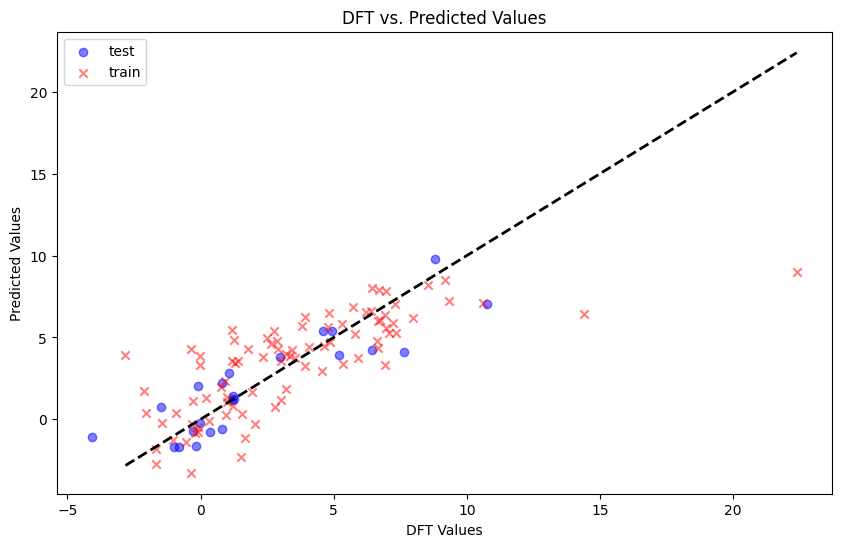

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')
plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

[ 0.805  4.585 -1.486 -0.027  6.438 -0.287  5.204 -0.089 -4.07  -0.991
  1.172  7.627  0.345  1.241  1.052 10.763 -0.795  4.95   2.992  0.823
  1.234 -0.184  8.817]
[ 2.20853572  5.37661425  0.72679182 -0.24099017  4.22436082 -0.74142036
  3.95551922  2.0327366  -1.10896327 -1.69948971  1.1934253   4.08236613
 -0.76405779  1.26044588  2.82737141  7.0565262  -1.70289567  5.40201137
  3.82808777 -0.60076882  1.41426813 -1.60881691  9.81749761]
[ 6.6480e+00  7.5600e-01  7.3560e+00  1.7760e+00  7.2340e+00 -3.2000e-01
  1.1860e+00  6.9400e+00  3.8030e+00  3.0280e+00  9.1870e+00  3.2160e+00
  4.5460e+00  2.2384e+01  1.5300e+00  1.2020e+00  3.2170e+00  2.7560e+00
 -7.8000e-02  2.8050e+00  6.4310e+00  9.3140e+00  2.8640e+00  3.3740e+00
  3.0370e+00  2.4940e+00 -1.3000e-02  6.9290e+00  4.8350e+00  5.3510e+00
  9.4900e-01  4.6480e+00  5.2980e+00  5.9090e+00  2.9040e+00 -3.5000e-02
 -1.0400e+00  6.9520e+00 -9.3500e-01  7.9640e+00  5.8110e+00 -5.4100e-01
  1.9900e-01 -3.6500e-01  4.8690e+00 -1.687

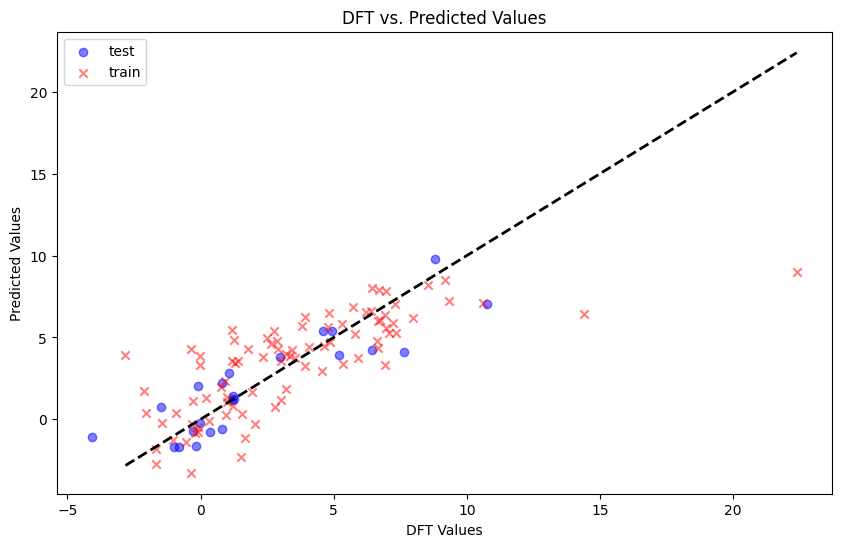

In [58]:
print(y_test)
y_predict_test = model.predict(x_test)
print(y_predict_test)

print(y_train)
y_predict_train = model.predict(x_train)
print(y_predict_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_test, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, y_predict_train, alpha=0.5, color='red', label='train', marker='x')

plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()